In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data in to python environment

In [2]:
#loading data set
data= pd.read_excel("iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# feature discription

In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

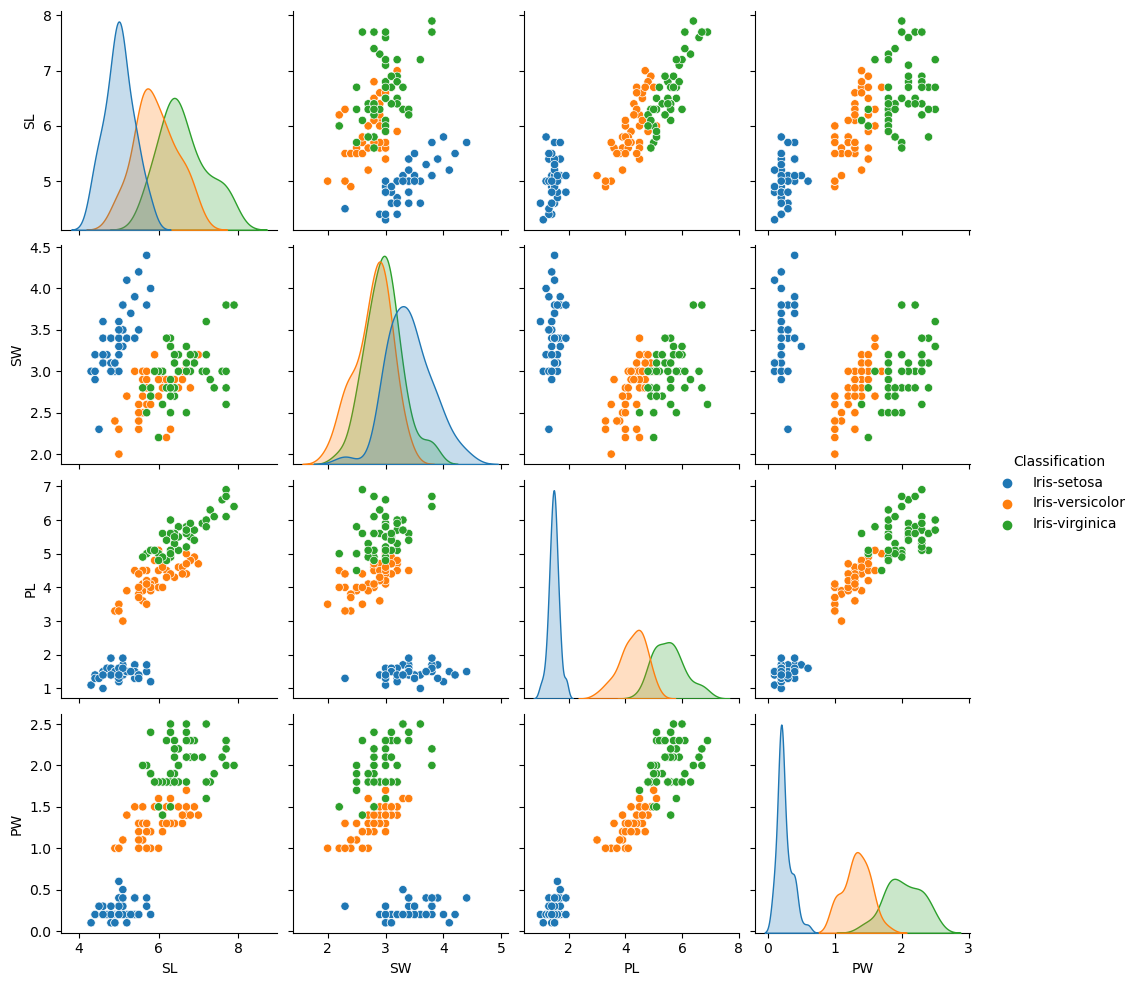

In [8]:
pairplot = sns.pairplot(data,hue = 'Classification')

In [9]:
# iris setosa is distinctly different from other two

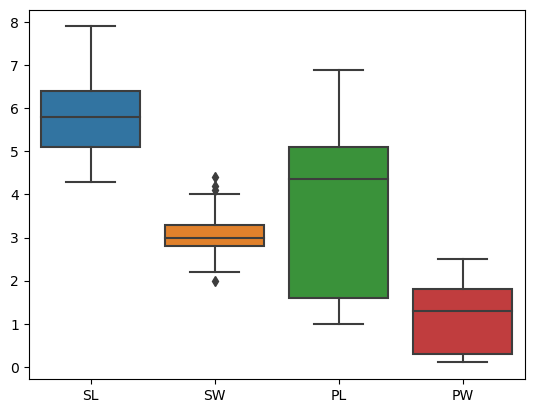

In [10]:
#checking for outliers
sns.boxplot(data=data)
plt.show(sns)

In [11]:
#verifying null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

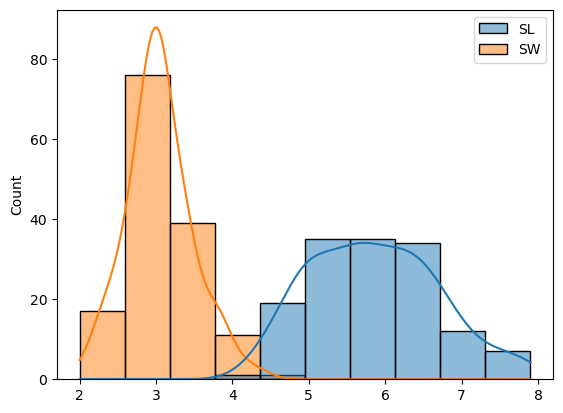

In [12]:
#handing null values
fre_graph = sns.histplot(data[['SL','SW']],kde = True)
plt.show(sns)

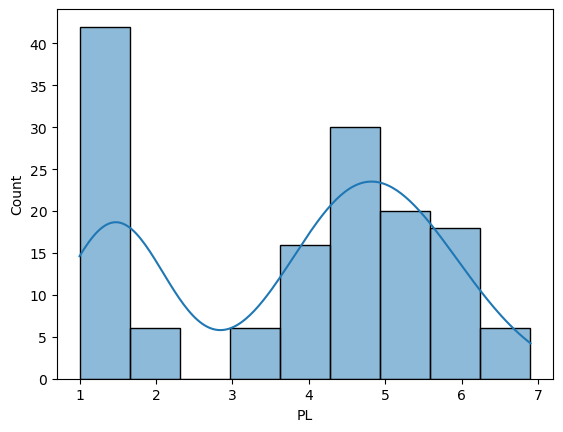

In [13]:
fre_graph= sns.histplot(data['PL'],kde = True)
plt.show(sns)

In [14]:
data[['SL','SW','PL']].mean()

SL    5.855944
SW    3.049306
PL    3.756250
dtype: float64

null values in SL and SW is replaced with mean

In [15]:
for i in ['SL','SW']:
    data[i] = data[i].fillna(data[i].mean())

In [16]:
data['PL'] = data['PL'].fillna(data['PL'].median())

In [17]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [18]:
#all null values are removed

# Do necessary preprocessing steps

In [19]:
#data has only one object column

In [20]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
#converting object column using map function
data['Classification'] = data['Classification'].map({'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2})

In [22]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [23]:
corr_matrix = data.corr()

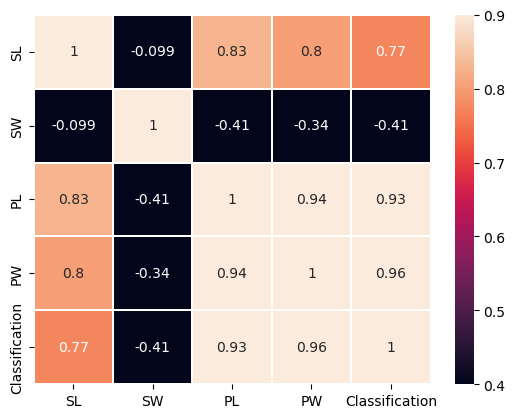

In [24]:
sns.heatmap(corr_matrix,vmax=0.9,vmin= 0.4,annot=True,linewidth = 0.2)
plt.show(sns)

In [25]:
#all the features are highly correlated

In [26]:
x=data.drop('Classification',axis=1)
y= data['Classification']

In [27]:
y.unique()

array([0, 1, 2], dtype=int64)

# Find out which classification model gives the best result to predict iris species(also do random forest algorithm)

In [28]:
#splitting the data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [30]:
x_train.shape

(120, 4)

In [31]:
y_train.shape

(120,)

In [32]:
x_test.shape

(30, 4)

In [33]:
y_test.shape

(30,)

In [34]:
#building model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [35]:
#evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [36]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


In [37]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [38]:
#checking feature importance

In [39]:
pd.Series(rf.feature_importances_,index= x.columns).sort_values(ascending=False)*100

PW    52.536154
PL    35.020380
SL     8.944245
SW     3.499221
dtype: float64

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression(random_state =42)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [42]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


In [43]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#to obtain optimum k values 
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    acc_values

In [45]:
plt.plot(neighbors,acc_values,'o')
plt.xlabel('k_value')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

In [46]:
classifier =KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [47]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


In [48]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
#SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 0)
classifier.fit(x_train,y_train)
y_pred_svc = classifier.predict(x_test)

In [50]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


conclusion

all models giving the accuracy and fi score same. all models are suitable for the dataset